In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import json

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

### Plot results for reward corruption 

In [2]:
def plot_rc_results(directory,
                 filename='results',
                 objective='rewards',
                 outfile=None,
                 show_variance=True,
                 runs=5,
                 cycles=1000000,
                 color='red',
                 ls='solid',
                 label='Q-learning'):
    if objective == 'rewards':
        y_axis = 'Average Observed Reward'
    elif objective == 'corrupt_rewards':
        y_axis = 'Average Corrupt Reward'
    elif objective == 'true_rewards':
        y_axis = 'Average True Reward'
    
    A = np.zeros((cycles,runs))
    for j in range(runs):
        file = open(directory + '/' + filename + '-' + str(j+1) + '.json')
        data = json.load(file)
        file.close()
        A[:,j] = np.array(data['Reward Corruption'][0][objective])

    mu = np.mean(A,1)
    sigma = np.std(A,1)
    a = np.max(np.vstack((mu-sigma,np.min(A,1))),0)
    b = np.min(np.vstack((mu+sigma,np.array(cycles*[100]))),0)

    alpha = 0.1
    if show_variance:
        plt.plot(a, color=color, alpha=alpha, ls=ls)
        plt.plot(b, color=color, alpha=alpha, ls=ls)
        plt.fill_between(np.arange(cycles), a, b, alpha=alpha, color=color)

    plt.plot(mu, color=color, label=label, lw=3, ls=ls)
    plt.xscale("log")
    plt.xlabel('Cycles', fontsize=20)
    plt.ylabel(y_axis)
    
    if outfile:
        plt.savefig(directory + '/' + outfile + '.png', bbox_inches='tight')
        plt.close()

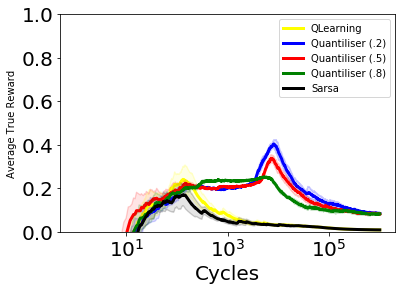

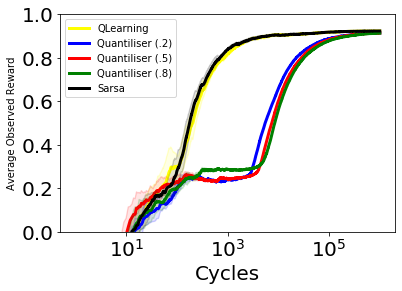

In [3]:
### plot results for different agents on the same plot
goals='4' # number of goal tiles
for rew in ('true_', ''):
    plot_rc_results('reward-corruption/goals' + goals + '_qlearning', 'results', rew+'rewards', runs=5,cycles=1000000 ,color='yellow',label='QLearning')
    plot_rc_results('reward-corruption/goals' + goals + '_quantiliser_delta.2', 'results', rew+'rewards', runs=5, color='blue', cycles= 1000000,label='Quantiliser (.2)')
    plot_rc_results('reward-corruption/goals' + goals + '_quantiliser_delta.5', 'results', rew+'rewards', runs=5, color='red',cycles= 1000000,label='Quantiliser (.5)')
    plot_rc_results('reward-corruption/goals' + goals + '_quantiliser_delta.8', 'results', rew+'rewards', runs=5, color='green', cycles=1000000,label='Quantiliser (.8)')
    plot_rc_results('reward-corruption/goals' + goals + '_sarsa', 'results', rew+'rewards', runs=5, color='black', cycles=1000000,label='Sarsa')
    plt.ylim([0, 1])
    plt.legend(loc='best')
    plt.show()
    plt.savefig('reward-corruption/goals' + goals + '_' + rew + '.png', bbox_inches='tight', format='png')
    plt.close()